# Import Libraries

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#grouping

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Object Creation

In [61]:
S = pd.Series([1,3,5,np.nan,6,8])
S

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [62]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [63]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.439957,-0.951752,1.757619,0.032152
2013-01-02,-0.298372,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,-0.323937,-0.658014
2013-01-04,1.673630,0.067069,-0.789541,-1.425442
2013-01-05,-0.069848,0.799930,0.885098,0.565781
2013-01-06,-0.490747,-1.126166,-0.671452,-1.160855


In [64]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test","train","test","train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [65]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data

In [66]:
df.head()

,A,B,C,D
2013-01-01,-0.439957,-0.951752,1.757619,0.032152
2013-01-02,-0.298372,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,-0.323937,-0.658014
2013-01-04,1.673630,0.067069,-0.789541,-1.425442
2013-01-05,-0.069848,0.799930,0.885098,0.565781


In [67]:
df.tail()

,A,B,C,D
2013-01-02,-0.298372,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,-0.323937,-0.658014
2013-01-04,1.673630,0.067069,-0.789541,-1.425442
2013-01-05,-0.069848,0.799930,0.885098,0.565781
2013-01-06,-0.490747,-1.126166,-0.671452,-1.160855


In [68]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [69]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [70]:
df.to_numpy()

array([[-0.43995712, -0.95175215,  1.75761855,  0.03215231],
       [-0.29837187,  1.94696652,  0.36650843,  0.52029968],
       [ 0.70453702,  2.37818221, -0.323937  , -0.65801399],
       [ 1.67363047,  0.06706946, -0.78954142, -1.42544227],
       [-0.0698475 ,  0.79992999,  0.88509768,  0.56578072],
       [-0.49074746, -1.12616645, -0.67145233, -1.16085526]])

In [71]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [72]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.179874,0.519038,0.204049,-0.354346
std,0.852242,1.459349,0.993609,0.854510
min,-0.490747,-1.126166,-0.789541,-1.425442
25%,-0.404561,-0.697047,-0.584574,-1.035145
50%,-0.184110,0.433500,0.021286,-0.312931
75%,0.510941,1.660207,0.755450,0.398263
max,1.673630,2.378182,1.757619,0.565781


# Transposing your data:

In [73]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.439957,-0.298372,0.704537,1.673630,-0.069848,-0.490747
B,-0.951752,1.946967,2.378182,0.067069,0.799930,-1.126166
C,1.757619,0.366508,-0.323937,-0.789541,0.885098,-0.671452
D,0.032152,0.520300,-0.658014,-1.425442,0.565781,-1.160855


# Sorting by an axis:


In [74]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.032152,1.757619,-0.951752,-0.439957
2013-01-02,0.520300,0.366508,1.946967,-0.298372
2013-01-03,-0.658014,-0.323937,2.378182,0.704537
2013-01-04,-1.425442,-0.789541,0.067069,1.673630
2013-01-05,0.565781,0.885098,0.799930,-0.069848
2013-01-06,-1.160855,-0.671452,-1.126166,-0.490747


# Sorting by values:

In [75]:
df.sort_values(by="B")

,A,B,C,D
2013-01-06,-0.490747,-1.126166,-0.671452,-1.160855
2013-01-01,-0.439957,-0.951752,1.757619,0.032152
2013-01-04,1.673630,0.067069,-0.789541,-1.425442
2013-01-05,-0.069848,0.799930,0.885098,0.565781
2013-01-02,-0.298372,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,-0.323937,-0.658014


# Getting

In [76]:
df["A"]

2013-01-01   -0.439957
2013-01-02   -0.298372
2013-01-03    0.704537
2013-01-04    1.673630
2013-01-05   -0.069848
2013-01-06   -0.490747
Freq: D, Name: A, dtype: float64

In [77]:
df[0:3]

,A,B,C,D
2013-01-01,-0.439957,-0.951752,1.757619,0.032152
2013-01-02,-0.298372,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,-0.323937,-0.658014


In [78]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.298372,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,-0.323937,-0.658014
2013-01-04,1.673630,0.067069,-0.789541,-1.425442


# Selection by label

In [79]:
df.loc[dates[0]]

A   -0.439957
B   -0.951752
C    1.757619
D    0.032152
Name: 2013-01-01 00:00:00, dtype: float64

# Selecting on a multi-axis by label:

In [80]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.439957,-0.951752
2013-01-02,-0.298372,1.946967
2013-01-03,0.704537,2.378182
2013-01-04,1.673630,0.067069
2013-01-05,-0.069848,0.799930
2013-01-06,-0.490747,-1.126166


In [81]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.298372,1.946967
2013-01-03,0.704537,2.378182
2013-01-04,1.673630,0.067069


In [82]:
df.loc["20130102", ["A", "B"]]

A   -0.298372
B    1.946967
Name: 2013-01-02 00:00:00, dtype: float64

# For getting a scalar value:

In [83]:
df.loc[dates[0], "A"]

-0.43995712352309835

In [84]:
 df.at[dates[0], "A"]

-0.43995712352309835

# Selection by position

In [85]:
df.iloc[3]

A    1.673630
B    0.067069
C   -0.789541
D   -1.425442
Name: 2013-01-04 00:00:00, dtype: float64

In [86]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.673630,0.067069
2013-01-05,-0.069848,0.799930


In [87]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.298372,0.366508
2013-01-03,0.704537,-0.323937
2013-01-05,-0.069848,0.885098


In [88]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.298372,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,-0.323937,-0.658014


In [89]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.951752,1.757619
2013-01-02,1.946967,0.366508
2013-01-03,2.378182,-0.323937
2013-01-04,0.067069,-0.789541
2013-01-05,0.799930,0.885098
2013-01-06,-1.126166,-0.671452


In [90]:
df.iloc[1, 1]

1.9469665215514778

In [91]:
df.iat[1, 1]

1.9469665215514778

# Boolean indexing

In [92]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.704537,2.378182,-0.323937,-0.658014
2013-01-04,1.673630,0.067069,-0.789541,-1.425442


In [93]:
 df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.757619,0.032152
2013-01-02,NaN,1.946967,0.366508,0.520300
2013-01-03,0.704537,2.378182,NaN,NaN
2013-01-04,1.673630,0.067069,NaN,NaN
2013-01-05,NaN,0.799930,0.885098,0.565781
2013-01-06,NaN,NaN,NaN,NaN


In [94]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2


,A,B,C,D,E
2013-01-01,-0.439957,-0.951752,1.757619,0.032152,one
2013-01-02,-0.298372,1.946967,0.366508,0.520300,one
2013-01-03,0.704537,2.378182,-0.323937,-0.658014,two
2013-01-04,1.673630,0.067069,-0.789541,-1.425442,three
2013-01-05,-0.069848,0.799930,0.885098,0.565781,four
2013-01-06,-0.490747,-1.126166,-0.671452,-1.160855,three


In [95]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.704537,2.378182,-0.323937,-0.658014,two
2013-01-05,-0.069848,0.799930,0.885098,0.565781,four


# Setting

In [96]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [97]:
df.at[dates[0], "A"] = 0
df.iat[0, 1] = 0
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,1.757619,5
2013-01-02,-0.298372,1.946967,0.366508,5
2013-01-03,0.704537,2.378182,-0.323937,5
2013-01-04,1.673630,0.067069,-0.789541,5
2013-01-05,-0.069848,0.799930,0.885098,5
2013-01-06,-0.490747,-1.126166,-0.671452,5


In [98]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2


,A,B,C,D
2013-01-01,0.000000,0.000000,-1.757619,-5
2013-01-02,-0.298372,-1.946967,-0.366508,-5
2013-01-03,-0.704537,-2.378182,-0.323937,-5
2013-01-04,-1.673630,-0.067069,-0.789541,-5
2013-01-05,-0.069848,-0.799930,-0.885098,-5
2013-01-06,-0.490747,-1.126166,-0.671452,-5


# Missing Data

In [99]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.757619,5,1.0
2013-01-02,-0.298372,1.946967,0.366508,5,1.0
2013-01-03,0.704537,2.378182,-0.323937,5,NaN
2013-01-04,1.673630,0.067069,-0.789541,5,NaN


# Drop Any Row

In [100]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.757619,5,1.0
2013-01-02,-0.298372,1.946967,0.366508,5,1.0


In [101]:
# Fill missing data
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.757619,5,1.0
2013-01-02,-0.298372,1.946967,0.366508,5,1.0
2013-01-03,0.704537,2.378182,-0.323937,5,5.0
2013-01-04,1.673630,0.067069,-0.789541,5,5.0


In [102]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# Operations

In [103]:
df.mean()

A    0.253200
B    0.677664
C    0.204049
D    5.000000
dtype: float64

In [104]:
#operation on other axis
df.mean(1)

2013-01-01    1.689405
2013-01-02    1.753776
2013-01-03    1.939696
2013-01-04    1.487790
2013-01-05    1.653795
2013-01-06    0.677908
Freq: D, dtype: float64

In [105]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [106]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.295463,1.378182,-1.323937,4.0
2013-01-04,-1.326370,-2.932931,-3.789541,2.0
2013-01-05,-5.069848,-4.200070,-4.114902,0.0
2013-01-06,NaN,NaN,NaN,NaN


# Applying Funs to the Data

In [107]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,1.757619,5
2013-01-02,-0.298372,1.946967,2.124127,10
2013-01-03,0.406165,4.325149,1.800190,15
2013-01-04,2.079796,4.392218,1.010649,20
2013-01-05,2.009948,5.192148,1.895746,25
2013-01-06,1.519201,4.065982,1.224294,30


In [108]:
df.apply(lambda x: x.max() - x.min())

A    2.164378
B    3.504349
C    2.547160
D    0.000000
dtype: float64

In [109]:
# Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    1
2    1
3    2
4    3
5    6
6    5
7    4
8    3
9    3
dtype: int32

In [110]:
s.value_counts()

3    4
1    2
2    1
4    1
5    1
6    1
dtype: int64

# String Methods

In [111]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge / Concat..

In [112]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.448590,1.526872,-1.037265,0.545760
1,-0.372589,0.090216,0.698450,1.225218
2,0.783039,1.569006,-1.225941,-0.704354
3,1.193969,1.021383,-0.396061,-0.399404
4,0.624921,-0.586998,-1.614436,0.020063
5,0.604460,-0.796027,-0.387384,0.548227
6,-0.441824,-0.608826,-0.812264,0.130237
7,0.211751,1.263623,0.437487,-2.218169
8,-0.467176,-0.955613,-0.412005,-0.977822
9,0.035828,-2.094297,0.203086,0.104965


In [113]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.448590,1.526872,-1.037265,0.545760
1,-0.372589,0.090216,0.698450,1.225218
2,0.783039,1.569006,-1.225941,-0.704354
3,1.193969,1.021383,-0.396061,-0.399404
4,0.624921,-0.586998,-1.614436,0.020063
5,0.604460,-0.796027,-0.387384,0.548227
6,-0.441824,-0.608826,-0.812264,0.130237
7,0.211751,1.263623,0.437487,-2.218169
8,-0.467176,-0.955613,-0.412005,-0.977822
9,0.035828,-2.094297,0.203086,0.104965


# Perform Join

In [114]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [115]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [116]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [117]:
# Example 2
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [119]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [120]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [125]:
df = pd.DataFrame(
   ....:     {
   ....:         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   ....:         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   ....:         "C": np.random.randn(8),
   ....:         "D": np.random.randn(8),
   ....:     }
   ....: )
df

,A,B,C,D
0,foo,one,0.429609,-1.013800
1,bar,one,-0.771542,0.589684
2,foo,two,-1.870940,0.243445
3,bar,three,-0.318923,0.031025
4,foo,two,-0.571660,0.857336
5,bar,two,-0.973893,-0.731433
6,foo,one,0.179761,1.082515
7,foo,three,0.713839,0.503237


In [126]:
df.groupby("A").sum()

,C,D
A,,
bar,-2.064359,-0.110724
foo,-1.119391,1.672732


In [127]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.771542  0.589684
    three -0.318923  0.031025
    two   -0.973893 -0.731433
foo one    0.609370  0.068714
    three  0.713839  0.503237
    two   -2.442600  1.100781

# Reshaping 
# Stack

In [128]:
tuples = list(
   ....:     zip(
   ....:         *[
   ....:             ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ....:             ["one", "two", "one", "two", "one", "two", "one", "two"],
   ....:         ]
   ....:     )
   ....: )
   ....: 


In [130]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.752951 -0.728678
      two    -0.155890  0.800659
baz   one    -0.810781  1.079737
      two     0.475660  2.599423

In [131]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.752951
               B   -0.728678
       two     A   -0.155890
               B    0.800659
baz    one     A   -0.810781
               B    1.079737
       two     A    0.475660
               B    2.599423
dtype: float64

In [132]:
stacked.unstack()

A         B
first second                    
bar   one    -1.752951 -0.728678
      two    -0.155890  0.800659
baz   one    -0.810781  1.079737
      two     0.475660  2.599423

In [133]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.752951 -0.155890
      B -0.728678  0.800659
baz   A -0.810781  0.475660
      B  1.079737  2.599423

In [134]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.752951 -0.810781
       B -0.728678  1.079737
two    A -0.155890  0.475660
       B  0.800659  2.599423

# Pivot tables

In [136]:
df = pd.DataFrame(
   .....:     {
   .....:         "A": ["one", "one", "two", "three"] * 3,
   .....:         "B": ["A", "B", "C"] * 4,
   .....:         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
   .....:         "D": np.random.randn(12),
   .....:         "E": np.random.randn(12),
   .....:     }
   .....: )
   .....: 
df

,A,B,C,D,E
0,one,A,foo,-2.894705,1.904746
1,one,B,foo,0.054152,-0.154000
2,two,C,foo,-1.494873,0.437470
3,three,A,bar,-0.401378,0.814350
4,one,B,bar,0.315050,0.268219
5,one,C,bar,1.411934,-2.331714
6,two,A,foo,1.791969,-0.888435
7,three,B,foo,0.788210,-0.450244
8,one,C,foo,1.121237,-1.088811
9,one,A,bar,0.446260,-0.408073


In [139]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.446260 -2.894705
      B  0.315050  0.054152
      C  1.411934  1.121237
three A -0.401378       NaN
      B       NaN  0.788210
      C -1.812487       NaN
two   A       NaN  1.791969
      B -0.453143       NaN
      C       NaN -1.494873

In [140]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")


In [141]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    25757
Freq: 5T, dtype: int32

In [142]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.798528
2012-03-07    2.054702
2012-03-08   -1.277497
2012-03-09   -0.323388
2012-03-10    0.317205
Freq: D, dtype: float64

In [143]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.798528
2012-03-07 00:00:00+00:00    2.054702
2012-03-08 00:00:00+00:00   -1.277497
2012-03-09 00:00:00+00:00   -0.323388
2012-03-10 00:00:00+00:00    0.317205
Freq: D, dtype: float64

In [144]:
# Converting to another time zone:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.798528
2012-03-06 19:00:00-05:00    2.054702
2012-03-07 19:00:00-05:00   -1.277497
2012-03-08 19:00:00-05:00   -0.323388
2012-03-09 19:00:00-05:00    0.317205
Freq: D, dtype: float64

In [145]:
# Converting between time span representations
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


2012-01-31    0.987059
2012-02-29   -0.345304
2012-03-31   -0.300587
2012-04-30    1.058123
2012-05-31   -0.252107
Freq: M, dtype: float64

In [146]:
ps = ts.to_period()
ps

2012-01    0.987059
2012-02   -0.345304
2012-03   -0.300587
2012-04    1.058123
2012-05   -0.252107
Freq: M, dtype: float64

In [147]:
ps.to_timestamp()

2012-01-01    0.987059
2012-02-01   -0.345304
2012-03-01   -0.300587
2012-04-01    1.058123
2012-05-01   -0.252107
Freq: MS, dtype: float64

In [148]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -1.672668
1990-06-01 09:00    1.744043
1990-09-01 09:00    1.867103
1990-12-01 09:00   -2.051895
1991-03-01 09:00    0.924309
Freq: H, dtype: float64

# Categoricals

In [150]:
df = pd.DataFrame(
   .....:     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   .....: )
   .....: 
df["grade"] = df["raw_grade"].astype("category")
df["grade"]       

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [151]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [152]:
df["grade"] = df["grade"].cat.set_categories(
   .....:     ["very bad", "bad", "medium", "good", "very good"]
   .....: )
   .....: 
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [153]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [154]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [163]:
import matplotlib.pyplot as plt
plt.close("all")

<AxesSubplot:>

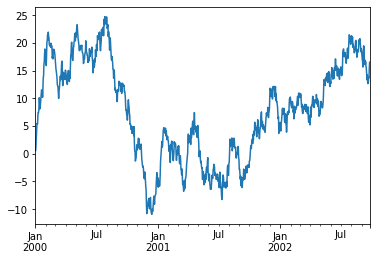

In [164]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

In [168]:
df = pd.DataFrame(
   .....:     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
   .....: )
   .....: 
df = df.cumsum()
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

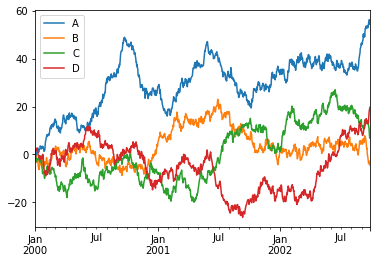

In [172]:
df.plot()
plt.legend(loc='best')


# Getting data in/out
# CSV
# Writing to a csv file.

In [173]:
df.to_csv("foo.csv")